In [80]:
import numpy as np                                                  #Librería de cálculo númerico para Python. Para instalar usar: `pip install numpy`
import pandas as pd                                                 #Para crear una tabla de datos. Para instalar Pandas usar 'pip install pandas'

import tensorflow as tf                                             #Para instalar Tensorlfow usar `pip install tensorflow`
from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.datasets import load_breast_cancer                     #El conjunto de datos que vamos a usar. Para instalar Scikit-Learn usar `pip install scikit-learn`
from sklearn.model_selection import train_test_split                #Para dividir el conjunto de entrenamiento en train y test
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [34]:
vinos = pd.read_csv("./wine_v2.csv",  delimiter=";")

In [36]:
vinos.head(3)

,Tipo,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,i11,i12,i13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [66]:
vinos.Tipo.unique()

array([1, 2, 3], dtype=int64)

In [68]:
X = vinos.drop('Tipo', axis=1)
y = vinos['Tipo']

In [70]:
len(y.unique())

3

In [74]:
y1 = tf.keras.utils.to_categorical(y-1, num_classes=3)

In [82]:
# Normaliza todas las características a la misma escala
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y1, test_size=0.2, random_state=42)

In [86]:
n_vars = X_train.shape[1]
n_vars

13

In [89]:
modelo = Sequential([
    Dense(n_vars*2, activation='relu'),
    Dense(3, activation='softmax')  # 3 neuronas porque tenemos 3 clases
])

In [91]:
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [95]:
historia = modelo.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.3851 - loss: 1.0768 - val_accuracy: 0.4138 - val_loss: 1.0629
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3647 - loss: 1.0737 - val_accuracy: 0.4138 - val_loss: 1.0454
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4118 - loss: 1.0532 - val_accuracy: 0.4138 - val_loss: 1.0297
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4226 - loss: 1.0303 - val_accuracy: 0.4828 - val_loss: 1.0144
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4620 - loss: 1.0176 - val_accuracy: 0.5172 - val_loss: 0.9999
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4207 - loss: 1.0315 - val_accuracy: 0.5862 - val_loss: 0.9862
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5007 - loss: 1.0114 - val_accuracy: 0.6897 - val_loss: 0.9733
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6542 - loss: 0.9782 - val_accuracy: 0.6897 - val_loss

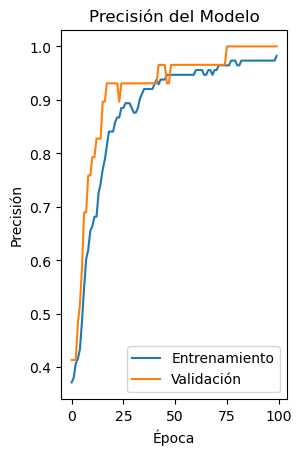

In [97]:
plt.subplot(1, 2, 1)
plt.plot(historia.history['accuracy'], label='Entrenamiento')
plt.plot(historia.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()


In [109]:
loss_test, acc_test = modelo.evaluate(X_test, y_test-1)  # Restamos 1 por las clases
loss_train, acc_train = modelo.evaluate(X_train, y_train-1)

print(f"\nPrecisión en entrenamiento: {acc_train:.4f}")
print(f"Precisión en test: {acc_test:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9421 - loss: -6.1864 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9866 - loss: -6.0687 

Precisión en entrenamiento: 0.9859
Precisión en test: 0.9444
